In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Generate synthetic time series data (sin function)
np.random.seed(0)
t = np.arange(0, 100, 0.1)
sin_wave = np.sin(t) + 0.1 * np.random.randn(len(t))




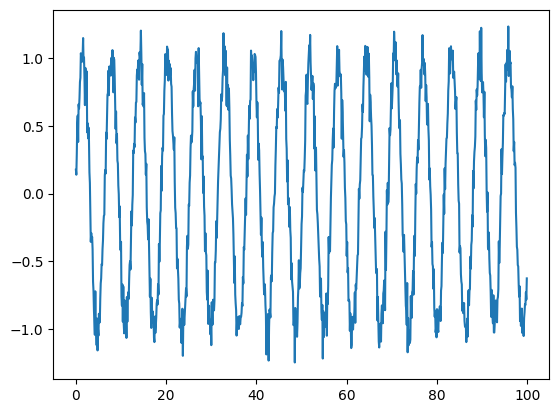

In [2]:
plt.plot(t,sin_wave)


Epoch 1/30

50/50 - 6s - loss: 0.4012 - val_loss: 0.2867 - 6s/epoch - 130ms/step
Epoch 2/30
50/50 - 0s - loss: 0.1666 - val_loss: 0.0556 - 333ms/epoch - 7ms/step
Epoch 3/30
50/50 - 0s - loss: 0.0322 - val_loss: 0.0246 - 483ms/epoch - 10ms/step
Epoch 4/30
50/50 - 0s - loss: 0.0264 - val_loss: 0.0248 - 340ms/epoch - 7ms/step
Epoch 5/30
50/50 - 0s - loss: 0.0257 - val_loss: 0.0241 - 348ms/epoch - 7ms/step
Epoch 6/30
50/50 - 0s - loss: 0.0256 - val_loss: 0.0238 - 332ms/epoch - 7ms/step
Epoch 7/30
50/50 - 0s - loss: 0.0254 - val_loss: 0.0240 - 379ms/epoch - 8ms/step
Epoch 8/30
50/50 - 0s - loss: 0.0253 - val_loss: 0.0238 - 333ms/epoch - 7ms/step
Epoch 9/30
50/50 - 0s - loss: 0.0252 - val_loss: 0.0237 - 333ms/epoch - 7ms/step
Epoch 10/30
50/50 - 0s - loss: 0.0253 - val_loss: 0.0235 - 345ms/epoch - 7ms/step
Epoch 11/30
50/50 - 0s - loss: 0.0251 - val_loss: 0.0236 - 349ms/epoch - 7ms/step
Epoch 12/30
50/50 - 0s - loss: 0.0250 - val_loss: 0.0239 - 377ms/epoch - 8ms/step
Epoch 13/30
50/50 - 0s 

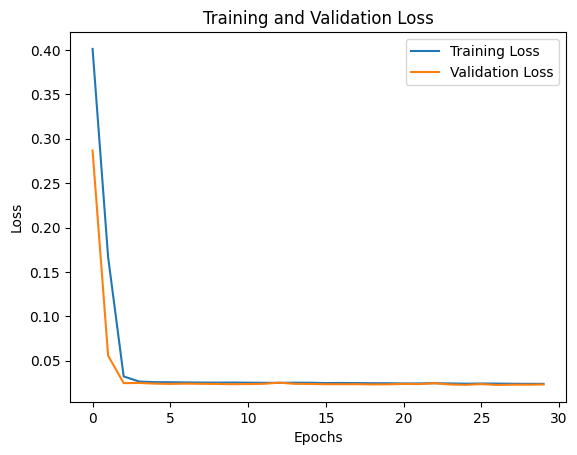

7/7 [==============================] - 1s 5ms/step


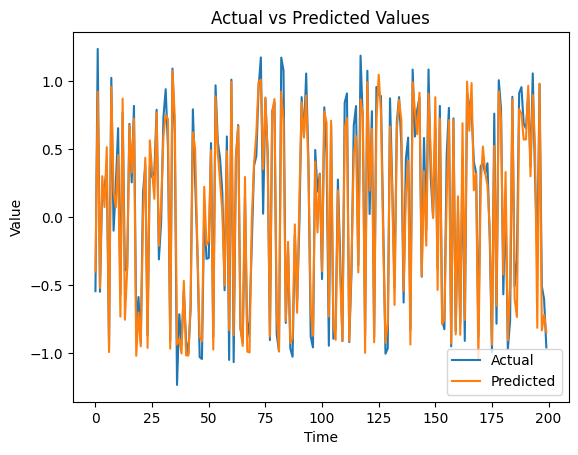

In [4]:
# Function to create time series samples and labels single timestamp single variate
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Hyperparameters
seq_length = 2 # Length of input sequences
epochs = 30
batch_size = 16

# Create sequences and labels
X, y = create_sequences(sin_wave, seq_length)

# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length,1 )),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize predictions vs actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
print((X_train.shape[0], X_train.shape[1], 1))

(792, 10, 1)


Epoch 1/50
50/50 - 6s - loss: 0.1815 - val_loss: 0.0039 - 6s/epoch - 129ms/step
Epoch 2/50
50/50 - 1s - loss: 0.0010 - val_loss: 1.3356e-04 - 731ms/epoch - 15ms/step
Epoch 3/50
50/50 - 1s - loss: 6.0199e-05 - val_loss: 3.4032e-05 - 549ms/epoch - 11ms/step
Epoch 4/50
50/50 - 1s - loss: 2.9397e-05 - val_loss: 2.2730e-05 - 950ms/epoch - 19ms/step
Epoch 5/50
50/50 - 1s - loss: 2.1954e-05 - val_loss: 1.5550e-05 - 735ms/epoch - 15ms/step
Epoch 6/50
50/50 - 1s - loss: 1.5600e-05 - val_loss: 1.2287e-05 - 1s/epoch - 22ms/step
Epoch 7/50
50/50 - 1s - loss: 1.1624e-05 - val_loss: 8.7650e-06 - 1s/epoch - 24ms/step
Epoch 8/50
50/50 - 1s - loss: 8.9276e-06 - val_loss: 7.5276e-06 - 1s/epoch - 21ms/step
Epoch 9/50
50/50 - 1s - loss: 6.4642e-06 - val_loss: 4.6075e-06 - 697ms/epoch - 14ms/step
Epoch 10/50
50/50 - 1s - loss: 5.0140e-06 - val_loss: 3.9000e-06 - 623ms/epoch - 12ms/step
Epoch 11/50
50/50 - 1s - loss: 4.4616e-06 - val_loss: 2.8455e-06 - 628ms/epoch - 13ms/step
Epoch 12/50
50/50 - 1s - loss: 

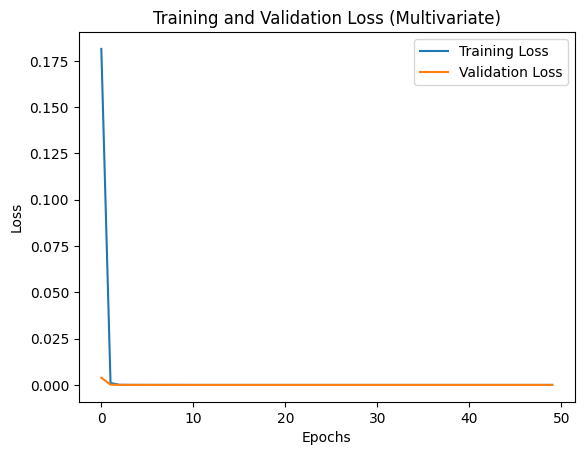

7/7 [==============================] - 0s 4ms/step


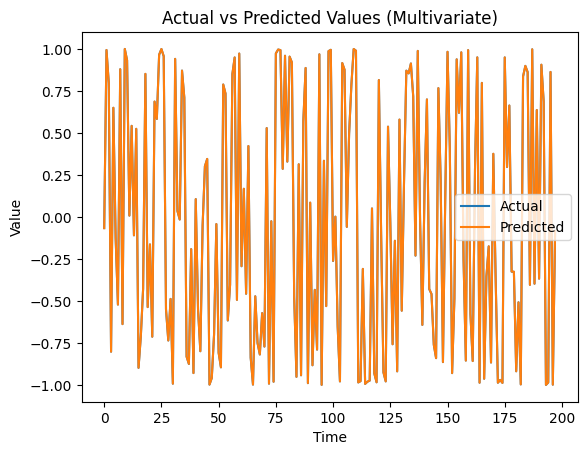

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create time series samples and labels for single timestamp multivariate
def create_sequences_multivariate(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length, :]
        label = data[i+seq_length, 0]  # Assuming the first column is the target variable
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Hyperparameters
seq_length = 1  # Length of input sequences
epochs = 30
batch_size = 16

# Generate synthetic multivariate time series data
np.random.seed(0)
t = np.arange(0, 100, 0.1)
sin_wave = np.sin(t)
cos_wave = np.cos(t)
multivariate_data = np.column_stack((sin_wave, cos_wave))  # Combine sin and cos waves

# Create sequences and labels for multivariate data
X_multi, y_multi = create_sequences_multivariate(multivariate_data, seq_length)

# Use train_test_split to split the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=4)

# Build LSTM model for multivariate data
model_multi = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 2)),  # 2 for the number of features
    Dense(1)
])
model_multi.compile(optimizer='adam', loss='mse')

# Train the model for multivariate data
history_multi = model_multi.fit(X_train_multi, y_train_multi, epochs=epochs, batch_size=batch_size, validation_data=(X_test_multi, y_test_multi), verbose=2)

# Plot training history for multivariate data
plt.plot(history_multi.history['loss'], label='Training Loss')
plt.plot(history_multi.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Multivariate)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set for multivariate data
y_pred_multi = model_multi.predict(X_test_multi)

# Visualize predictions vs actual values for multivariate data
plt.plot(y_test_multi, label='Actual')
plt.plot(y_pred_multi, label='Predicted')
plt.title('Actual vs Predicted Values (Multivariate)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Epoch 1/50
50/50 - 8s - loss: 0.2572 - val_loss: 0.0813 - 8s/epoch - 160ms/step
Epoch 2/50
50/50 - 1s - loss: 0.0608 - val_loss: 0.0323 - 680ms/epoch - 14ms/step
Epoch 3/50
50/50 - 1s - loss: 0.0202 - val_loss: 0.0187 - 574ms/epoch - 11ms/step
Epoch 4/50
50/50 - 1s - loss: 0.0175 - val_loss: 0.0191 - 750ms/epoch - 15ms/step
Epoch 5/50
50/50 - 1s - loss: 0.0158 - val_loss: 0.0227 - 583ms/epoch - 12ms/step
Epoch 6/50
50/50 - 1s - loss: 0.0179 - val_loss: 0.0182 - 668ms/epoch - 13ms/step
Epoch 7/50
50/50 - 1s - loss: 0.0163 - val_loss: 0.0176 - 587ms/epoch - 12ms/step
Epoch 8/50
50/50 - 1s - loss: 0.0156 - val_loss: 0.0172 - 647ms/epoch - 13ms/step
Epoch 9/50
50/50 - 1s - loss: 0.0162 - val_loss: 0.0202 - 611ms/epoch - 12ms/step
Epoch 10/50
50/50 - 1s - loss: 0.0154 - val_loss: 0.0173 - 600ms/epoch - 12ms/step
Epoch 11/50
50/50 - 1s - loss: 0.0152 - val_loss: 0.0175 - 833ms/epoch - 17ms/step
Epoch 12/50
50/50 - 1s - loss: 0.0145 - val_loss: 0.0169 - 1s/epoch - 21ms/step
Epoch 13/50
50/50 

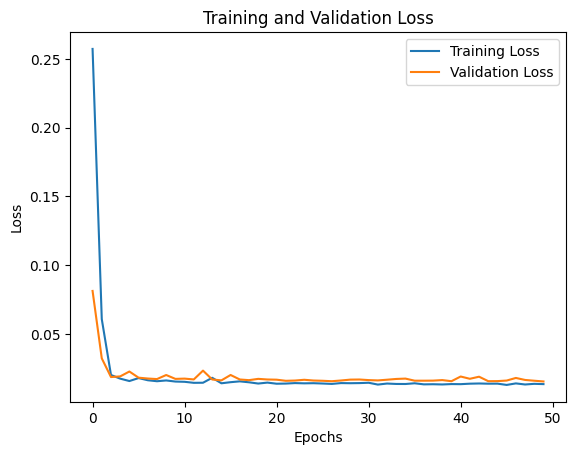

7/7 [==============================] - 1s 6ms/step


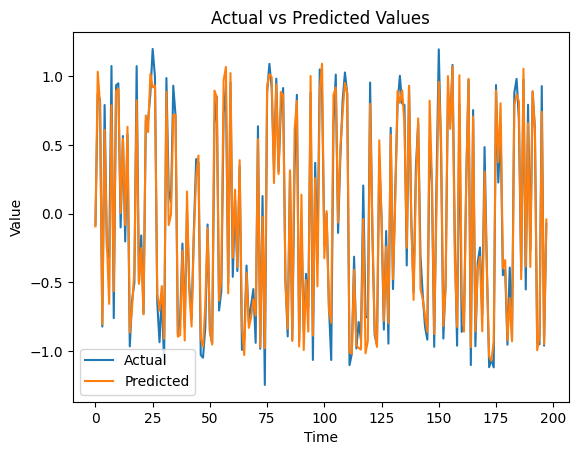

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create time series samples and labels for multi-timestamp single variate
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Hyperparameters
seq_length = 10  # Length of input sequences
epochs = 50
batch_size = 16

# Generate synthetic time series data
np.random.seed(0)
t = np.arange(0, 100, 0.1)
sin_wave = np.sin(t) + 0.1 * np.random.randn(len(t))

# Create sequences and labels
X, y = create_sequences(sin_wave, seq_length)

# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize predictions vs actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Epoch 1/50
50/50 - 7s - loss: 0.1553 - val_loss: 0.0018 - 7s/epoch - 139ms/step
Epoch 2/50
50/50 - 1s - loss: 8.1919e-04 - val_loss: 7.9287e-05 - 728ms/epoch - 15ms/step
Epoch 3/50
50/50 - 1s - loss: 3.9107e-05 - val_loss: 2.0009e-05 - 636ms/epoch - 13ms/step
Epoch 4/50
50/50 - 1s - loss: 1.5641e-05 - val_loss: 1.3051e-05 - 648ms/epoch - 13ms/step
Epoch 5/50
50/50 - 1s - loss: 1.0564e-05 - val_loss: 8.2085e-06 - 501ms/epoch - 10ms/step
Epoch 6/50
50/50 - 1s - loss: 7.4032e-06 - val_loss: 5.2210e-06 - 516ms/epoch - 10ms/step
Epoch 7/50
50/50 - 1s - loss: 4.6160e-06 - val_loss: 3.6165e-06 - 584ms/epoch - 12ms/step
Epoch 8/50
50/50 - 1s - loss: 2.9816e-06 - val_loss: 2.7011e-06 - 617ms/epoch - 12ms/step
Epoch 9/50
50/50 - 1s - loss: 2.1751e-06 - val_loss: 1.8438e-06 - 522ms/epoch - 10ms/step
Epoch 10/50
50/50 - 1s - loss: 1.6623e-06 - val_loss: 1.6822e-06 - 571ms/epoch - 11ms/step
Epoch 11/50
50/50 - 1s - loss: 1.2908e-06 - val_loss: 1.0877e-06 - 559ms/epoch - 11ms/step
Epoch 12/50
50/50 

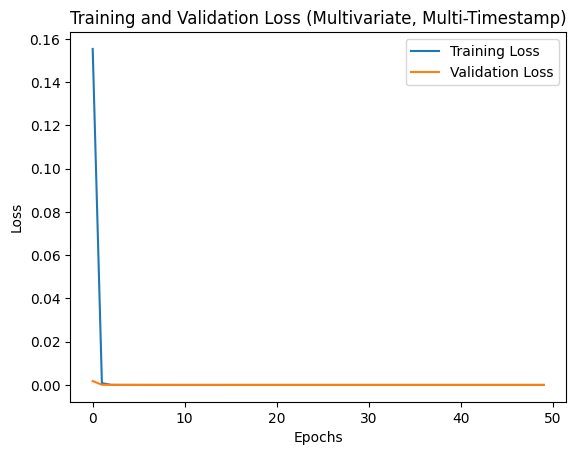

7/7 [==============================] - 1s 8ms/step


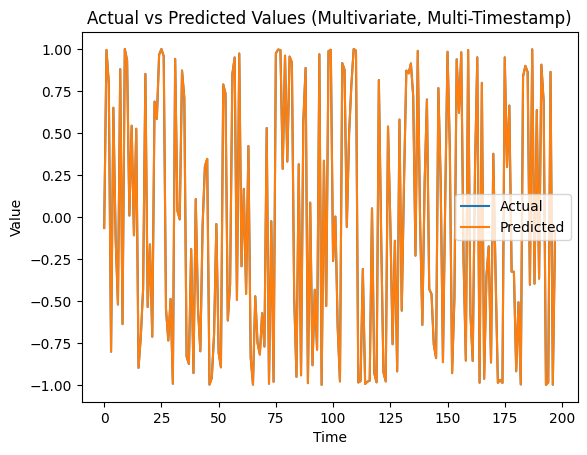

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create time series samples and labels for multi-timestamp multivariate
def create_sequences_multivariate_multi(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length, :]
        label = data[i+seq_length:i+seq_length+1, 0]  # Assuming the first column is the target variable
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Hyperparameters
seq_length_multi = 10  # Length of input sequences
epochs_multi = 50
batch_size_multi = 16

# Generate synthetic multivariate time series data
np.random.seed(0)
t = np.arange(0, 100, 0.1)
sin_wave = np.sin(t)
cos_wave = np.cos(t)
multivariate_data_multi = np.column_stack((sin_wave, cos_wave))  # Combine sin and cos waves

# Create sequences and labels for multivariate data with multiple timestamps
X_multi_multi, y_multi_multi = create_sequences_multivariate_multi(multivariate_data_multi, seq_length_multi)

# Use train_test_split to split the data into training and testing sets for multivariate data with multiple timestamps
X_train_multi_multi, X_test_multi_multi, y_train_multi_multi, y_test_multi_multi = train_test_split(X_multi_multi, y_multi_multi, test_size=0.2, random_state=4)

# Build LSTM model for multivariate data with multiple timestamps
model_multi_multi = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length_multi, 2)),  # 2 for the number of features
    Dense(1)
])
model_multi_multi.compile(optimizer='adam', loss='mse')

# Train the model for multivariate data with multiple timestamps
history_multi_multi = model_multi_multi.fit(X_train_multi_multi, y_train_multi_multi, epochs=epochs_multi, batch_size=batch_size_multi, validation_data=(X_test_multi_multi, y_test_multi_multi), verbose=0)

# Plot training history for multivariate data with multiple timestamps
plt.plot(history_multi_multi.history['loss'], label='Training Loss')
plt.plot(history_multi_multi.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Multivariate, Multi-Timestamp)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set for multivariate data with multiple timestamps
y_pred_multi_multi = model_multi_multi.predict(X_test_multi_multi)

# Visualize predictions vs actual values for multivariate data with multiple timestamps
plt.plot(y_test_multi_multi.flatten(), label='Actual')
plt.plot(y_pred_multi_multi.flatten(), label='Predicted')
plt.title('Actual vs Predicted Values (Multivariate, Multi-Timestamp)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
